In [1]:
import re
from pandas import DataFrame
import numpy as np
import matplotlib.font_manager as fm
import os
import matplotlib.pyplot as plt
import pandas as pd
from konlpy.tag import Kkma
import nltk
kkma = Kkma()
from wordcloud import WordCloud
from konlpy.tag import Twitter
from collections import Counter

In [2]:
#csv 불러오기
df = pd.read_csv('C:/Users/User/Desktop/개발_전처리/웹개발.csv',encoding = 'utf-8')
df

,주요 업무,자격요건 및 우대사항
0,사용기술Java C C Python 산업용 장비 데이터베이스 구축 및 서버관리데이터 운영,학력 대졸 이상 전공 컴퓨터공학과 소프트웨어과 등 경력자인 경우 프로젝트 진행이 ...
1,신규 개발 프로젝트 기획 및 설계 신규 개발 프로젝트 개발 진행 관리 빌드 점검시...,Cloud Server 개발 및 운영 경험 AWSEC2 Auto Scale Clo...
2,전자영수증 솔루션 고도화 빅데이터AI 연구 개발사용 기술Java Spring ...,JAVA 안드로이드 IOS 앱개발 웹개발 프로토콜 설계 등 분야별 능통자 핀테크 ...
3,Flutter 기반 네이티브 앱 개발 윈도우 어플리케이션 개발 Google Pla...,C CPP Flutter 언어 중 최소 2개 개발 경력 5년 이상 Native 어...
4,자사 호스팅클라우드 웹 서비스 개발 및 유지보수PHP 웹 서비스고도화PHP 프로젝...,경력 3년 7년 Modern PHP PSR 개발 Laravel framework...
...,...,...
275,뉴로핏 제품의 웹프론트엔드 신규 개발 및 유지 보수 리포트 템플릿 제작 디자인 시...,유관업무 경력 5년 이상 HTML CSS 및 Javascript 생태계에 이해가 ...
276,PC모바일웹뷰 환경의 프론트엔드 개발을 담당해요목표를 위해 기획자 디자이너 개발자가...,TDDATDD의 개념과 적용에 무리가 없는 분4년 이상의 개발 경력이 있거나 이에 ...
277,새로운 멤버를 찾게 된 배경에 대해서 말씀 드려요백앤드 개발자는 모던 아키텍트 개발...,이에요 벡앤드 개발 5년 이상의 경력을 가진 분포괄적인 IoT 서비스의 구조에 대해...
278,기존 쇼핑몰 사이트 PHP laravel 기반 리버스 엔지니어링 및 eCommer...,학력 대졸 이상 총 8년 이상의 PHP Java 기반 애플리케이션 개발 경험 5...


In [3]:
#사용할 column 선택
df = df[['주요 업무']]
df

,주요 업무
0,사용기술Java C C Python 산업용 장비 데이터베이스 구축 및 서버관리데이터 운영
1,신규 개발 프로젝트 기획 및 설계 신규 개발 프로젝트 개발 진행 관리 빌드 점검시...
2,전자영수증 솔루션 고도화 빅데이터AI 연구 개발사용 기술Java Spring ...
3,Flutter 기반 네이티브 앱 개발 윈도우 어플리케이션 개발 Google Pla...
4,자사 호스팅클라우드 웹 서비스 개발 및 유지보수PHP 웹 서비스고도화PHP 프로젝...
...,...
275,뉴로핏 제품의 웹프론트엔드 신규 개발 및 유지 보수 리포트 템플릿 제작 디자인 시...
276,PC모바일웹뷰 환경의 프론트엔드 개발을 담당해요목표를 위해 기획자 디자이너 개발자가...
277,새로운 멤버를 찾게 된 배경에 대해서 말씀 드려요백앤드 개발자는 모던 아키텍트 개발...
278,기존 쇼핑몰 사이트 PHP laravel 기반 리버스 엔지니어링 및 eCommer...


In [4]:
#txt로 저장
i = 'C:/Users/User/Desktop/개발_전처리/웹개발(주요업무).txt'
df.to_csv(i, sep = "\t", index = False, encoding='utf-8')

In [5]:
from konlpy.corpus import kobill
doc_ko = open(i, encoding='utf-8').read()
doc_ko

'주요 업무\n사용기술Java C C Python 산업용 장비 데이터베이스 구축 및 서버관리데이터 운영\n 신규 개발 프로젝트 기획 및 설계 신규 개발 프로젝트 개발 진행 관리 빌드 점검시연 QA 론칭 BtoC 라이브 서비스 유지보수 관리 서버클라이언트 개발 및 운영 관리 형상 관리 통합빌드 배포 소스품질 관리 외부 개발업체 발굴 평가 개발진행관리\n 전자영수증 솔루션 고도화 빅데이터AI 연구 개발사용 기술Java Spring   jQuery  JavaScript  Flutter    React Native  BigData  AI인공지능  Apache Tomcat\n Flutter 기반 네이티브 앱 개발 윈도우 어플리케이션 개발 Google Play Store Apple 앱 스토어 등록심사 관리\n 자사 호스팅클라우드 웹 서비스 개발 및 유지보수PHP 웹 서비스고도화PHP 프로젝트 관리\n SLAMNAVIGATIONFMS 프로그램 개발 및 고도화 로봇 태스크 프로그램 개발 및 고도화 로봇 운영 및 테스트서빙로봇 AMR 등  로봇 사용 교육 및 업체 기술 지원 정부과제 수행 오더피킹 로봇\n시스템 구축을 기반한 업무 프로세스 개선 및 시스템 기획설계운영현장 업무 환경 및 프로세스 분석을 통한 개선안 도출 효율화표준화최적화고객 서비스 프로세스 여행렌터카 기획 및 고도화내부 임직원 또는 외부 고객의 시스템 요구 사항에 대한 업무 프로세스 작성\n미디어커넥트팀은 콘텐츠의 유통 라인 전반에 기여하는 조직으로써 인프라 엔지니어의 업무는 크게 아래의 track으로 나뉩니다  자사 사이트 워드프레스bitnami beanstalk ec2코프링 AWS 기반의 서비스 인프라 운영 및 고도화 인프라 아키텍처 관련 문제 해결속도 개선 자원 사용 최적화비용 감소 인프라 및 애플리케이션 모니터링 및 알림 개선저희는 다음과 같은 언어 및 기술 베이스로 일하고 있습니다 CICD AWS Github 언어 및 \n 자사 호스팅클라우드 웹 서비스 개발 및 유지보수PHP 웹 서비스고도화PHP 프로

In [6]:
from konlpy.tag import Okt; t = Okt()
tokens_ko = t.nouns(doc_ko)
tokens_ko

['주요',
 '업무',
 '사용',
 '기술',
 '산업',
 '용',
 '장비',
 '데이터베이스',
 '구축',
 '및',
 '서버',
 '관리',
 '데이터',
 '운영',
 '신규',
 '개발',
 '프로젝트',
 '기획',
 '및',
 '설계',
 '신규',
 '개발',
 '프로젝트',
 '개발',
 '진행',
 '관리',
 '빌드',
 '점검',
 '시연',
 '론칭',
 '라이브',
 '서비스',
 '유지',
 '보수',
 '관리',
 '서버',
 '클라이언트',
 '개발',
 '및',
 '운영',
 '관리',
 '형상',
 '관리',
 '통합',
 '빌드',
 '배포',
 '소스',
 '품질',
 '관리',
 '외부',
 '개발',
 '업체',
 '발굴',
 '평가',
 '개발',
 '진행',
 '관리',
 '전자',
 '영수증',
 '솔루션',
 '고도화',
 '빅데이터',
 '연구',
 '개발',
 '사용',
 '기술',
 '인공',
 '지능',
 '기반',
 '네이티',
 '브',
 '앱',
 '개발',
 '윈도우',
 '어플리케이션',
 '개발',
 '앱',
 '스토어',
 '등록',
 '심사',
 '관리',
 '자사',
 '호스팅',
 '클라우드',
 '웹',
 '서비스',
 '개발',
 '및',
 '유지',
 '보수',
 '웹',
 '서비스',
 '고도화',
 '프로젝트',
 '관리',
 '프로그램',
 '개발',
 '및',
 '고도화',
 '로봇',
 '태스크',
 '프로그램',
 '개발',
 '및',
 '고도화',
 '로봇',
 '운영',
 '및',
 '테스트',
 '서빙',
 '로봇',
 '등',
 '로봇',
 '사용',
 '교육',
 '및',
 '업체',
 '기술',
 '지원',
 '정부',
 '과제',
 '수행',
 '더피',
 '킹',
 '로봇',
 '시스템',
 '구축',
 '기반',
 '업무',
 '프로세스',
 '개선',
 '및',
 '시스템',
 '기획',
 '설계',
 '운영',
 '현장',
 '업무',
 '환경'

In [7]:
ko = nltk.Text(tokens_ko, name = 'work')
print(len(ko.tokens))
print(len(set(ko.tokens)))
ko.vocab()

13511
1121


FreqDist({'개발': 705, '및': 391, '서비스': 253, '개발자': 189, '운영': 179, '팀': 179, '관리': 155, '설계': 148, '기반': 148, '강남': 147, ...})

In [8]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:\Windows\Fonts\malgun.ttf").get_name()
rc('font', family=font_name)

In [15]:
stop_words = [
   '강남','문제', '환경','기술','지식','개발','사용','이해','기반','필수','가능','우대','경험','관심','활용','관련','능력','이해도','대한','보유','이상','실행','디지털','제안','플루','인','제작','수립','신규','업무','사','경력','분','및','해결', '일', '등', '직', '더', '위', '수', '팀', '자사', '마','피', '내']

ko = [each_word for each_word in ko if each_word not in stop_words]
ko

['주요',
 '산업',
 '용',
 '장비',
 '데이터베이스',
 '구축',
 '서버',
 '관리',
 '데이터',
 '운영',
 '프로젝트',
 '기획',
 '설계',
 '프로젝트',
 '진행',
 '관리',
 '빌드',
 '점검',
 '시연',
 '론칭',
 '라이브',
 '서비스',
 '유지',
 '보수',
 '관리',
 '서버',
 '클라이언트',
 '운영',
 '관리',
 '형상',
 '관리',
 '통합',
 '빌드',
 '배포',
 '소스',
 '품질',
 '관리',
 '외부',
 '업체',
 '발굴',
 '평가',
 '진행',
 '관리',
 '전자',
 '영수증',
 '솔루션',
 '고도화',
 '빅데이터',
 '연구',
 '인공',
 '지능',
 '네이티',
 '브',
 '앱',
 '윈도우',
 '어플리케이션',
 '앱',
 '스토어',
 '등록',
 '심사',
 '관리',
 '호스팅',
 '클라우드',
 '웹',
 '서비스',
 '유지',
 '보수',
 '웹',
 '서비스',
 '고도화',
 '프로젝트',
 '관리',
 '프로그램',
 '고도화',
 '로봇',
 '태스크',
 '프로그램',
 '고도화',
 '로봇',
 '운영',
 '테스트',
 '서빙',
 '로봇',
 '로봇',
 '교육',
 '업체',
 '지원',
 '정부',
 '과제',
 '수행',
 '더피',
 '킹',
 '로봇',
 '시스템',
 '구축',
 '프로세스',
 '개선',
 '시스템',
 '기획',
 '설계',
 '운영',
 '현장',
 '프로세스',
 '분석',
 '통한',
 '개선',
 '안',
 '도출',
 '효율',
 '표준화',
 '최적화',
 '고객',
 '서비스',
 '프로세스',
 '여행',
 '렌터카',
 '기획',
 '고도화',
 '내부',
 '임',
 '직원',
 '외부',
 '고객',
 '시스템',
 '요구',
 '사항',
 '프로세스',
 '작성',
 '미디어',
 '커넥트',
 '콘텐츠',
 '유통',
 '라인',
 '전반',
 '기여',
 '조

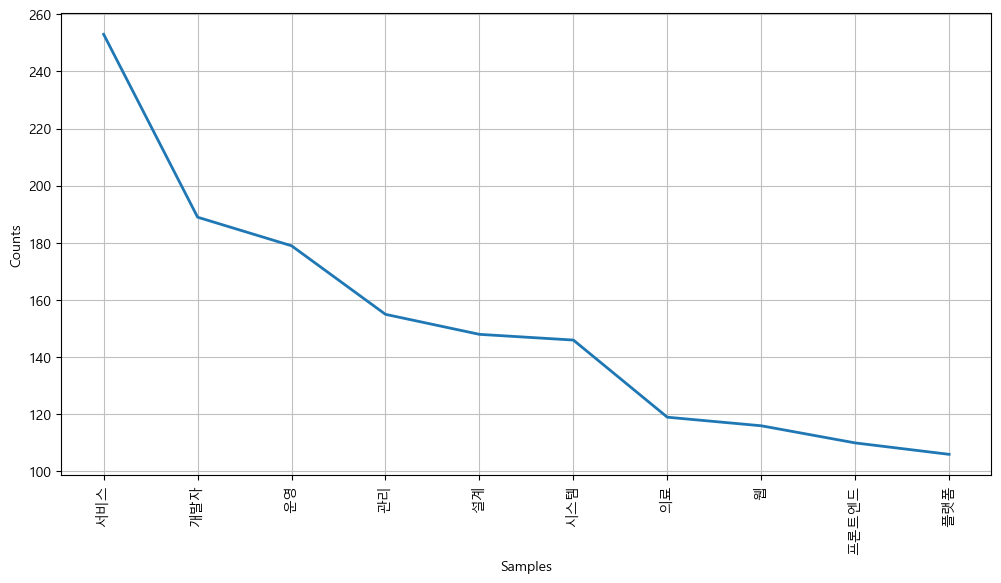

In [16]:
ko = nltk.Text(ko, name= 'Work')
plt.figure(figsize=(12,6))
ko.plot(10)
plt.show()

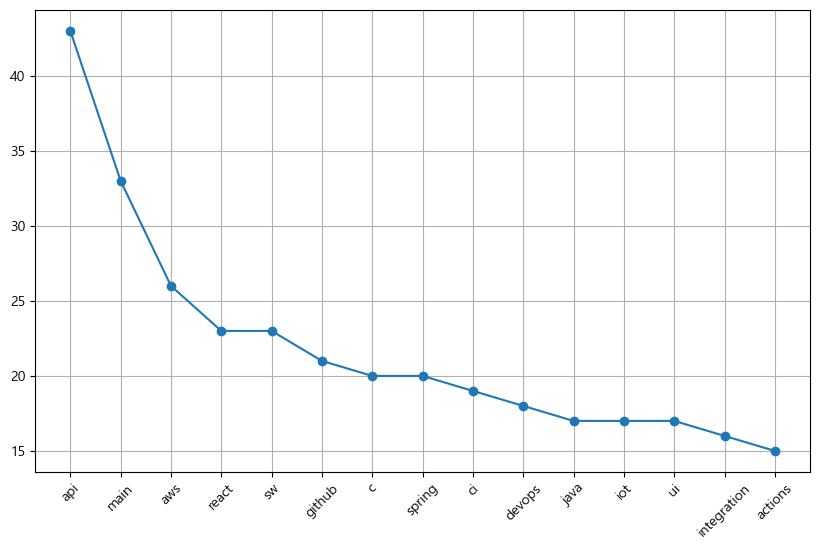

In [14]:
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException
from nltk.corpus import stopwords

# NLTK 불용어 목록 로드
stop_words = set(stopwords.words('english'))

#불용어 목록 추가
user_defined_stopwords = ['restful','rest','programming','continuous']
stop_words.update(user_defined_stopwords)

# 파일에서 텍스트를 읽는 함수
def read_file(file_name):
    with open(file_name, 'r', encoding='utf-8') as file:
        text = file.read()
    return text

# 텍스트를 영어 단어로만 토큰화하는 함수
def tokenize(text):
    words = re.findall(r'\b[a-zA-Z]+\b', text.lower())
    filtered_words = [word for word in words if word not in stop_words]
    return filtered_words

# 단어 빈도를 줄 그래프로 그리는 함수
def plot_word_frequencies(frequencies):
    sorted_words = sorted(frequencies.items(), key=lambda x: x[1], reverse=True)

    words = [word for word, count in sorted_words[:15]]
    counts = [count for word, count in sorted_words[:15]]

    plt.figure(figsize=(10, 6))
    plt.plot(words, counts, marker='o')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()


# 메인 스크립트
file_name = i
text = read_file(file_name)
words = tokenize(text)
word_frequencies = Counter(words)
plot_word_frequencies(word_frequencies)